In [1]:
#Import Dependencies
import sklearn
import tensorflow
import keras
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

In [2]:
#Veriable Creation

mp_holistic = mp.solutions.holistic             # Loades The Model (Holistic Model) To make detection
mp_drawing_utils = mp.solutions.drawing_utils   # draws the key points

In [3]:
#BGI to RGB for mediapipe as media pipe need RGB format

def mediapipe_detection(image, model):
    images = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # color Convertion BGR to RGB
    images.flags.writeable = False                    # image will no longer writable
    result = model.process(image)                  # make Pridiction
    images.flags.writeable = True                     # image will writable again
    images = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)  # color Convertion RGB to BGR
    return images, result

In [4]:
#Drawing The Landmarks on The Frames

def draw_landmarks(image, results):
    mp_drawing_utils.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS)
    #mp_drawing_utils.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION) # Draw Face Connections
    mp_drawing_utils.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw Pose Connection
    mp_drawing_utils.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw Left Hand Connection
    mp_drawing_utils.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw Right Hand Connectio

In [5]:
# Drawing The Landmarks in Different Style

def draw_landmarks_style(image, results):
    # Draw Face Connections
    mp_drawing_utils.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS,
                                    mp_drawing_utils.DrawingSpec(color=(80, 110, 10), thickness=1, circle_radius=1),
                                    mp_drawing_utils.DrawingSpec(color=(80, 256, 121), thickness=1, circle_radius=1)
                                    )
    #mp_drawing_utils.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION) # Draw Face Connections
    # Draw Pose Connection
    mp_drawing_utils.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                                    mp_drawing_utils.DrawingSpec(color=(80, 22, 10), thickness=2, circle_radius=4),
                                    mp_drawing_utils.DrawingSpec(color=(80, 44, 121), thickness=2, circle_radius=2)
                                    )
    # Draw Left Hand Connection
    mp_drawing_utils.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                                    mp_drawing_utils.DrawingSpec(color=(121, 22, 76), thickness=2, circle_radius=4),
                                    mp_drawing_utils.DrawingSpec(color=(121, 44, 250), thickness=2, circle_radius=2)
                                    )
    # Draw Right Hand Connection
    mp_drawing_utils.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                                    mp_drawing_utils.DrawingSpec(color=(245, 117, 66), thickness=2, circle_radius=4),
                                    mp_drawing_utils.DrawingSpec(color=(245, 66, 230), thickness=2, circle_radius=2)
                                    )

In [7]:
#Keypoint using Mediapipe *Holistic*

cap = cv2.VideoCapture(0)
#Set Mediapipe Model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence= 0.5) as holistic:
    while cap.isOpened():
        # read Feed (camera Video Frame)
        ret, frame = cap.read()

        # Make Detection
        image, results = mediapipe_detection(frame, holistic)
        """print(results) # Prints The Results
        print("Face Landmarks \n")
        print(results.face_landmarks) # Face Landmarks
        print("Pose Landmarks \n")
        print(results.pose_landmarks) # Pose Landmarks
        print("Left Hand Landmarks \n")
        print(results.left_hand_landmarks) # Left Hand Landmarks
        print("Right Hand Landmarks \n")
        print(results.right_hand_landmarks) # Right Hand Landmarks
        print("count \n")
        print(results.count)
        print("index \n")
        print(results.index)
        print("mro \n")
        print(results.mro)"""

        # Draw Landmarks in Style
        draw_landmarks_style(image, results)

        # Draw Landmarks in  normal
        #draw_landmarks(image, results)

        # Output To Screan
        cv2.imshow('OpenCV Feed', image)

        #break
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows() #destroys windows

In [8]:
# Extract Keypoint Values

pose = []
for res in results.face_landmarks.landmark:
    test = np.array([res.x, res.y, res.z])
    pose.append(test)
print(results.face_landmarks.landmark)
print(len(results.face_landmarks.landmark))
print(len(pose))
print(pose)

[x: 0.36041060090065
y: 0.7327209115028381
z: -0.02928386814892292
, x: 0.3566051721572876
y: 0.6792249083518982
z: -0.05444179102778435
, x: 0.3561612665653229
y: 0.6957230567932129
z: -0.028669120743870735
, x: 0.3407238721847534
y: 0.6368666291236877
z: -0.04190712422132492
, x: 0.3550814688205719
y: 0.6648561358451843
z: -0.05796303227543831
, x: 0.35210293531417847
y: 0.6469504237174988
z: -0.05404248088598251
, x: 0.34420719742774963
y: 0.6053650379180908
z: -0.026915909722447395
, x: 0.2673378586769104
y: 0.6218920946121216
z: 0.005871269386261702
, x: 0.33995121717453003
y: 0.5781979560852051
z: -0.020778600126504898
, x: 0.33800724148750305
y: 0.5605027675628662
z: -0.022946154698729515
, x: 0.32856816053390503
y: 0.4902380406856537
z: -0.011313182301819324
, x: 0.36111417412757874
y: 0.7397514581680298
z: -0.02775077149271965
, x: 0.3612200617790222
y: 0.7446966171264648
z: -0.024242376908659935
, x: 0.36082813143730164
y: 0.7463486790657043
z: -0.019574599340558052
, x: 0.36

[array([ 0.3604106 ,  0.73272091, -0.02928387]), array([ 0.35660517,  0.67922491, -0.05444179]), array([ 0.35616127,  0.69572306, -0.02866912]), array([ 0.34072387,  0.63686663, -0.04190712]), array([ 0.35508147,  0.66485614, -0.05796303]), array([ 0.35210294,  0.64695042, -0.05404248]), array([ 0.3442072 ,  0.60536504, -0.02691591]), array([0.26733786, 0.62189209, 0.00587127]), array([ 0.33995122,  0.57819796, -0.0207786 ]), array([ 0.33800724,  0.56050277, -0.02294615]), array([ 0.32856816,  0.49023804, -0.01131318]), array([ 0.36111417,  0.73975146, -0.02775077]), array([ 0.36122006,  0.74469662, -0.02424238]), array([ 0.36082813,  0.74634868, -0.0195746 ]), array([ 0.36122569,  0.74869537, -0.01820613]), array([ 0.36202011,  0.75374824, -0.01994357]), array([ 0.36287558,  0.76062387, -0.02216643]), array([ 0.36355767,  0.76862967, -0.02098663]), array([ 0.36443943,  0.78527027, -0.01159721]), array([ 0.35677463,  0.68695712, -0.04921947]), array([ 0.34623215,  0.68890226, -0.036104

In [9]:
def extract_keypoints(results):
    face = pose = np.array([[res.x, res.y, res.z] for res in
                            results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468 * 3)
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in
                     results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33 * 4)
    rh = np.array([[res.x, res.y, res.z] for res in
                   results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(
        21 * 3)
    lh = np.array([[res.x, res.y, res.z] for res in
                   results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21 * 3)

    return np.concatenate([pose, face, lh, rh])

In [10]:
#   Setting Up The Folders for Collection

result_test = extract_keypoints(results)
print(result_test)
np.save('0', result_test)
np.load('0.npy')

[ 0.35773697  0.68330103 -1.64994168 ...  0.          0.
  0.        ]


array([ 0.35773697,  0.68330103, -1.64994168, ...,  0.        ,
        0.        ,  0.        ])

In [11]:
#   Path For the Exported Data, numpy Arrays

DATA_PATH = os.path.join('MP_Data_C2C_New_1')

In [12]:
#   Actions that we try to detect or Labels

actions = np.array(['Bye', 'Hi', 'We are Engineers','I am King', 'Jay Hind'])

In [13]:
# In Action Detection We Need a Sequence of Frames rather than a Single Frame

no_sequences = 10       # Number Of Sequence Given or Equivalent to 10 videos data
sequence_length = 30    # Length Of The Sequence Given or 30 numbers of frame in each Video

In [14]:
# Data acquisition loop by Actions and Number of Sequences

for action in actions:
    for sequence in range(no_sequences):
        try:
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

In [15]:
# Collecting The Keypoins data

cap = cv2.VideoCapture(0)
#Set Mediapipe Model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence= 0.5) as holistic:
    # Loop by Actions
    for action in actions:
        # Loop By Sequences 0...29
        for sequence in range(no_sequences):
            # Loop By length of Video or Sequence
            for frame_num in range (sequence_length):

                # read Feed (camera Video Frame)
                ret, frame = cap.read()

                # Make Detection
                image, results = mediapipe_detection(frame, holistic)
                # Draw Landmarks in Style
                draw_landmarks_style(image, results)

                # Draw Landmarks in  normal
                # draw_landmarks(image, results)

                # Apply Collection Logic To Pause The Video While Collection
                if frame_num == 0:
                    cv2.putText(image, 'Starting Collection Of Frames', (120,200),
                                cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 1, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting Frames for {} video number {}'.format(action, sequence), (15, 12),
                                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    cv2.waitKey(2000)
                else:
                    cv2.putText(image, 'Collecting Frames for {} video number {}'.format(action, sequence), (15, 12),
                                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)

                # new Export Key Points
                Keypoint = extract_keypoints(results)
                #print("Keypoints: \n")
                #print(Keypoint)
                npy_path = os.path.join(DATA_PATH, action, str(sequence),str(frame_num))
                np.save(npy_path, Keypoint)

                # Output To Screan
                cv2.imshow('OpenCV Feed', image)

                # break
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break

    cap.release()
    cv2.destroyAllWindows()  # destroys windowsq

In [15]:
# Preprocessing The Data and Create Lables and Features

from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

label_map = {label : num for num, label in enumerate(actions)}
print(label_map)

sequences, labels = [], [] # sequences represents Feature Data or X data and Labels represents Y or Label Data
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

{'Bye': 0, 'Hi': 1, 'We are Engineers': 2, 'I am King': 3, 'Jay Hind': 4}


In [16]:
print(sequences)
print(np.array(sequences).shape)
print(labels)
print(np.array(labels).shape)

[[array([ 0.56586576,  0.81182384, -1.73124158, ...,  0.        ,
        0.        ,  0.        ]), array([ 0.55654365,  0.81662279, -2.03954983, ...,  0.        ,
        0.        ,  0.        ]), array([ 0.55233824,  0.82175159, -2.0749135 , ...,  0.        ,
        0.        ,  0.        ]), array([ 0.54858935,  0.82216328, -1.96294975, ...,  0.        ,
        0.        ,  0.        ]), array([ 0.54725605,  0.82401931, -1.92745018, ...,  0.        ,
        0.        ,  0.        ]), array([ 0.54729557,  0.82337224, -1.88116968, ...,  0.        ,
        0.        ,  0.        ]), array([ 0.54533845,  0.76679242, -1.59405065, ...,  0.        ,
        0.        ,  0.        ]), array([ 0.53681684,  0.7152518 , -1.36343181, ...,  0.        ,
        0.        ,  0.        ]), array([ 0.5235979 ,  0.7009871 , -1.26739597, ...,  0.        ,
        0.        ,  0.        ]), array([ 0.51384425,  0.69834465, -1.47593856, ...,  0.        ,
        0.        ,  0.        ]), array([ 

In [18]:
# PreProcess

X = np.array(sequences)
print(X.shape)

Y = to_categorical(labels).astype(int)
print(Y) # [1,0,0] Bye [0,1,0] Hi [0, 0, 1] We are Engineers

(50, 30, 1662)
[[1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [0 1 0 0 0]
 [0 1 0 0 0]
 [0 1 0 0 0]
 [0 1 0 0 0]
 [0 1 0 0 0]
 [0 1 0 0 0]
 [0 1 0 0 0]
 [0 1 0 0 0]
 [0 1 0 0 0]
 [0 1 0 0 0]
 [0 0 1 0 0]
 [0 0 1 0 0]
 [0 0 1 0 0]
 [0 0 1 0 0]
 [0 0 1 0 0]
 [0 0 1 0 0]
 [0 0 1 0 0]
 [0 0 1 0 0]
 [0 0 1 0 0]
 [0 0 1 0 0]
 [0 0 0 1 0]
 [0 0 0 1 0]
 [0 0 0 1 0]
 [0 0 0 1 0]
 [0 0 0 1 0]
 [0 0 0 1 0]
 [0 0 0 1 0]
 [0 0 0 1 0]
 [0 0 0 1 0]
 [0 0 0 1 0]
 [0 0 0 0 1]
 [0 0 0 0 1]
 [0 0 0 0 1]
 [0 0 0 0 1]
 [0 0 0 0 1]
 [0 0 0 0 1]
 [0 0 0 0 1]
 [0 0 0 0 1]
 [0 0 0 0 1]
 [0 0 0 0 1]]


In [19]:
#Train And Test Split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.05) # test_size=0.05 means Test Pertition will be 5% of our Data
print(x_train.shape)  # Shape of the training input data
print(x_test.shape)   # Shape of the testing input data
print(y_train.shape)  # Shape of the training target data
print(y_test.shape)   # Shape of the testing target data

(47, 30, 1662)
(3, 30, 1662)
(47, 5)
(3, 5)


In [20]:
# Build and Train The LSTM Neural Network

from keras.models import Sequential # Sequential Neural Network
from keras.layers import LSTM, Dense # LSTM Layer for Action Detection
from keras.callbacks import TensorBoard # Trace and Monitor Our Model

log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [21]:
# Building The Neural Network Architecture

model = Sequential() # Instantiating the model
# There is the three sets of LSTM layer
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30, 1662))) # 64 LSTM Units 30 Frames 1662 Keypoints
model.add(LSTM(128, return_sequences=True, activation='relu')) # 128 LSTM Units
model.add(LSTM(64, return_sequences=False, activation='relu')) # 64 LSTM the return_sequences is false here as the next layer is the Dence Layer Not a LSTM Layer
model.add(Dense(64, activation='relu')) # 64 Dense units fully Connected layers
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax')) # as activation='softmax' so it will return a value which has a probability betwwen  0 to 1

In [22]:
res = [.7,.9,.4,.8]
print(actions[np.argmax(res)])

res = [.7,.8,.4]
print(actions[np.argmax(res)])

res = [.1,.2,.4]
print(actions[np.argmax(res)])

Hi
Hi
We are Engineers


In [52]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])
model.fit(x_train, y_train, epochs=500, callbacks=[tb_callback]) # tensorboard --logdir=.

Epoch 1/500
2/2 [==============================] - 14s 222ms/step - loss: 1.2910 - categorical_accuracy: 0.4255
Epoch 2/500
2/2 [==============================] - 0s 178ms/step - loss: 1.3130 - categorical_accuracy: 0.3404
Epoch 3/500
2/2 [==============================] - 0s 179ms/step - loss: 1.2936 - categorical_accuracy: 0.3404
Epoch 4/500
2/2 [==============================] - 1s 345ms/step - loss: 1.1973 - categorical_accuracy: 0.4468
Epoch 5/500
2/2 [==============================] - 0s 180ms/step - loss: 1.1492 - categorical_accuracy: 0.4468
Epoch 6/500
2/2 [==============================] - 0s 165ms/step - loss: 1.1749 - categorical_accuracy: 0.4468
Epoch 7/500
2/2 [==============================] - 0s 221ms/step - loss: 1.1416 - categorical_accuracy: 0.4894
Epoch 8/500
2/2 [==============================] - 1s 226ms/step - loss: 1.1075 - categorical_accuracy: 0.5319
Epoch 9/500
2/2 [==============================] - 0s 188ms/step - loss: 1.1164 - categorical_accuracy: 0.4894


2/2 [==============================] - 0s 192ms/step - loss: 0.9932 - categorical_accuracy: 0.5532
Epoch 75/500
2/2 [==============================] - 0s 231ms/step - loss: 0.8496 - categorical_accuracy: 0.6383
Epoch 76/500
2/2 [==============================] - 0s 184ms/step - loss: 0.9273 - categorical_accuracy: 0.5532
Epoch 77/500
2/2 [==============================] - 0s 189ms/step - loss: 0.9039 - categorical_accuracy: 0.5957
Epoch 78/500
2/2 [==============================] - 0s 212ms/step - loss: 0.8437 - categorical_accuracy: 0.5745
Epoch 79/500
2/2 [==============================] - 0s 203ms/step - loss: 0.8357 - categorical_accuracy: 0.5957
Epoch 80/500
2/2 [==============================] - 0s 173ms/step - loss: 0.8008 - categorical_accuracy: 0.6383
Epoch 81/500
2/2 [==============================] - 0s 163ms/step - loss: 0.8723 - categorical_accuracy: 0.5532
Epoch 82/500
2/2 [==============================] - 0s 179ms/step - loss: 0.8180 - categorical_accuracy: 0.6170
Epoch

2/2 [==============================] - 0s 178ms/step - loss: 1.5934 - categorical_accuracy: 0.2128
Epoch 147/500
2/2 [==============================] - 0s 175ms/step - loss: 1.5929 - categorical_accuracy: 0.2128
Epoch 148/500
2/2 [==============================] - 0s 190ms/step - loss: 1.5913 - categorical_accuracy: 0.2128
Epoch 149/500
2/2 [==============================] - 0s 181ms/step - loss: 1.5906 - categorical_accuracy: 0.2128
Epoch 150/500
2/2 [==============================] - 0s 193ms/step - loss: 1.5897 - categorical_accuracy: 0.2128
Epoch 151/500
2/2 [==============================] - 0s 191ms/step - loss: 1.5887 - categorical_accuracy: 0.2128
Epoch 152/500
2/2 [==============================] - 0s 212ms/step - loss: 1.5880 - categorical_accuracy: 0.2128
Epoch 153/500
2/2 [==============================] - 1s 293ms/step - loss: 1.5871 - categorical_accuracy: 0.2128
Epoch 154/500
2/2 [==============================] - 1s 376ms/step - loss: 1.5864 - categorical_accuracy: 0.21

2/2 [==============================] - 0s 174ms/step - loss: 1.5748 - categorical_accuracy: 0.2340
Epoch 219/500
2/2 [==============================] - 0s 207ms/step - loss: 1.5747 - categorical_accuracy: 0.2340
Epoch 220/500
2/2 [==============================] - 0s 175ms/step - loss: 1.5747 - categorical_accuracy: 0.2340
Epoch 221/500
2/2 [==============================] - 0s 173ms/step - loss: 1.5748 - categorical_accuracy: 0.2340
Epoch 222/500
2/2 [==============================] - 0s 194ms/step - loss: 1.5748 - categorical_accuracy: 0.2340
Epoch 223/500
2/2 [==============================] - 0s 165ms/step - loss: 1.5746 - categorical_accuracy: 0.2340
Epoch 224/500
2/2 [==============================] - 0s 165ms/step - loss: 1.5746 - categorical_accuracy: 0.2340
Epoch 225/500
2/2 [==============================] - 0s 173ms/step - loss: 1.5745 - categorical_accuracy: 0.2340
Epoch 226/500
2/2 [==============================] - 0s 174ms/step - loss: 1.5746 - categorical_accuracy: 0.23

2/2 [==============================] - 0s 163ms/step - loss: 1.5745 - categorical_accuracy: 0.2340
Epoch 291/500
2/2 [==============================] - 0s 173ms/step - loss: 1.5744 - categorical_accuracy: 0.2340
Epoch 292/500
2/2 [==============================] - 0s 183ms/step - loss: 1.5743 - categorical_accuracy: 0.2340
Epoch 293/500
2/2 [==============================] - 0s 165ms/step - loss: 1.5744 - categorical_accuracy: 0.2340
Epoch 294/500
2/2 [==============================] - 0s 169ms/step - loss: 1.5742 - categorical_accuracy: 0.2340
Epoch 295/500
2/2 [==============================] - 0s 165ms/step - loss: 1.5741 - categorical_accuracy: 0.2340
Epoch 296/500
2/2 [==============================] - 0s 179ms/step - loss: 1.5744 - categorical_accuracy: 0.2340
Epoch 297/500
2/2 [==============================] - 0s 184ms/step - loss: 1.5743 - categorical_accuracy: 0.2340
Epoch 298/500
2/2 [==============================] - 0s 174ms/step - loss: 1.5746 - categorical_accuracy: 0.23

2/2 [==============================] - 0s 173ms/step - loss: 1.5745 - categorical_accuracy: 0.2340
Epoch 363/500
2/2 [==============================] - 0s 183ms/step - loss: 1.5745 - categorical_accuracy: 0.2340
Epoch 364/500
2/2 [==============================] - 0s 173ms/step - loss: 1.5746 - categorical_accuracy: 0.2340
Epoch 365/500
2/2 [==============================] - 0s 192ms/step - loss: 1.5745 - categorical_accuracy: 0.2340
Epoch 366/500
2/2 [==============================] - 0s 194ms/step - loss: 1.5745 - categorical_accuracy: 0.2340
Epoch 367/500
2/2 [==============================] - 0s 194ms/step - loss: 1.5746 - categorical_accuracy: 0.2340
Epoch 368/500
2/2 [==============================] - 0s 181ms/step - loss: 1.5745 - categorical_accuracy: 0.2340
Epoch 369/500
2/2 [==============================] - 0s 166ms/step - loss: 1.5745 - categorical_accuracy: 0.2340
Epoch 370/500
2/2 [==============================] - 0s 176ms/step - loss: 1.5746 - categorical_accuracy: 0.23

2/2 [==============================] - 0s 162ms/step - loss: 1.5743 - categorical_accuracy: 0.2340
Epoch 435/500
2/2 [==============================] - 0s 170ms/step - loss: 1.5745 - categorical_accuracy: 0.2340
Epoch 436/500
2/2 [==============================] - 0s 165ms/step - loss: 1.5744 - categorical_accuracy: 0.2340
Epoch 437/500
2/2 [==============================] - 0s 268ms/step - loss: 1.5744 - categorical_accuracy: 0.2340
Epoch 438/500
2/2 [==============================] - 1s 237ms/step - loss: 1.5744 - categorical_accuracy: 0.2340
Epoch 439/500
2/2 [==============================] - 1s 313ms/step - loss: 1.5743 - categorical_accuracy: 0.2340
Epoch 440/500
2/2 [==============================] - 0s 163ms/step - loss: 1.5743 - categorical_accuracy: 0.2340
Epoch 441/500
2/2 [==============================] - 0s 173ms/step - loss: 1.5744 - categorical_accuracy: 0.2340
Epoch 442/500
2/2 [==============================] - 0s 163ms/step - loss: 1.5744 - categorical_accuracy: 0.23

In [25]:
print(model.summary()) # Summery of The Model

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 64)            442112    
                                                                 
 lstm_1 (LSTM)               (None, 30, 128)           98816     
                                                                 
 lstm_2 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 5)                 165       
                                                                 
Total params: 596,741
Trainable params: 596,741
Non-trai

In [27]:
# Make Predictions

result_x_test = model.predict(x_test)

print(np.sum(result_x_test))
print(actions[np.argmax(result_x_test[0])])
print(actions[np.argmax(y_test[0])])

1/1 [==============================] - 2s 2s/step
3.0
Hi
I am King


In [28]:
# Save The Model
model.save('action1_C1_3_1.h5')

In [29]:
# Reloade The Model
model.load_weights('action1_C1_3_1.h5')

In [30]:
#Evalution Using Confusion Matrix and Accuracy

from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

yhat = model.predict(x_test)
yTrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

print(multilabel_confusion_matrix(yTrue, yhat))
print(accuracy_score(yTrue, yhat))

yhat = model.predict(x_train)
yTrue = np.argmax(y_train, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

print(multilabel_confusion_matrix(yTrue, yhat))
print(accuracy_score(yTrue, yhat))

1/1 [==============================] - 0s 195ms/step
[[[2 1]
  [0 0]]

 [[1 1]
  [0 1]]

 [[2 0]
  [1 0]]

 [[2 0]
  [1 0]]]
0.3333333333333333
2/2 [==============================] - 0s 63ms/step
[[[35  2]
  [ 0 10]]

 [[37  0]
  [ 9  1]]

 [[33  5]
  [ 4  5]]

 [[21 17]
  [ 2  7]]

 [[38  0]
  [ 9  0]]]
0.48936170212765956


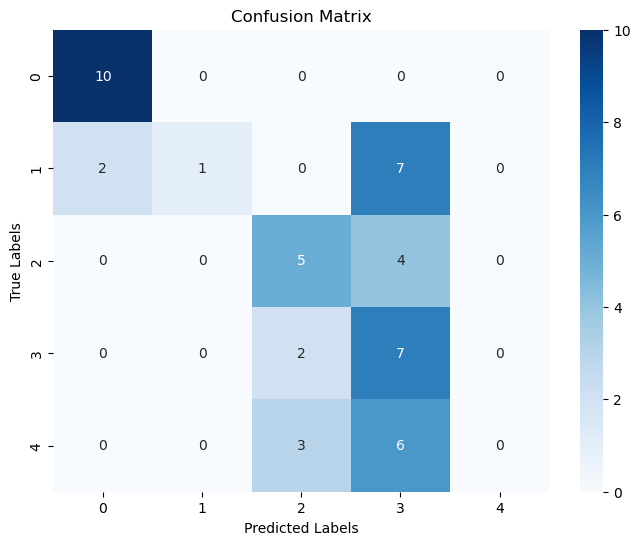

Accuracy: 0.48936170212765956


In [31]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score

# Compute the confusion matrix
cm = confusion_matrix(yTrue, yhat)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

# Compute and print the accuracy
accuracy = accuracy_score(yTrue, yhat)
print("Accuracy:", accuracy)

In [46]:
# Test Prediction VIew Bar

from scipy import stats

colors = [(245, 117, 16), (117, 245, 16), (16, 117, 245), (117, 245, 55), (117, 245, 80)]

In [49]:
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        #print(num)
        #print(prob)
        cv2.rectangle(output_frame, (0, 60 + num * 40), (int(prob * 100), 90 + num * 40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85 + num * 40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2,
                    cv2.LINE_AA)

    return output_frame

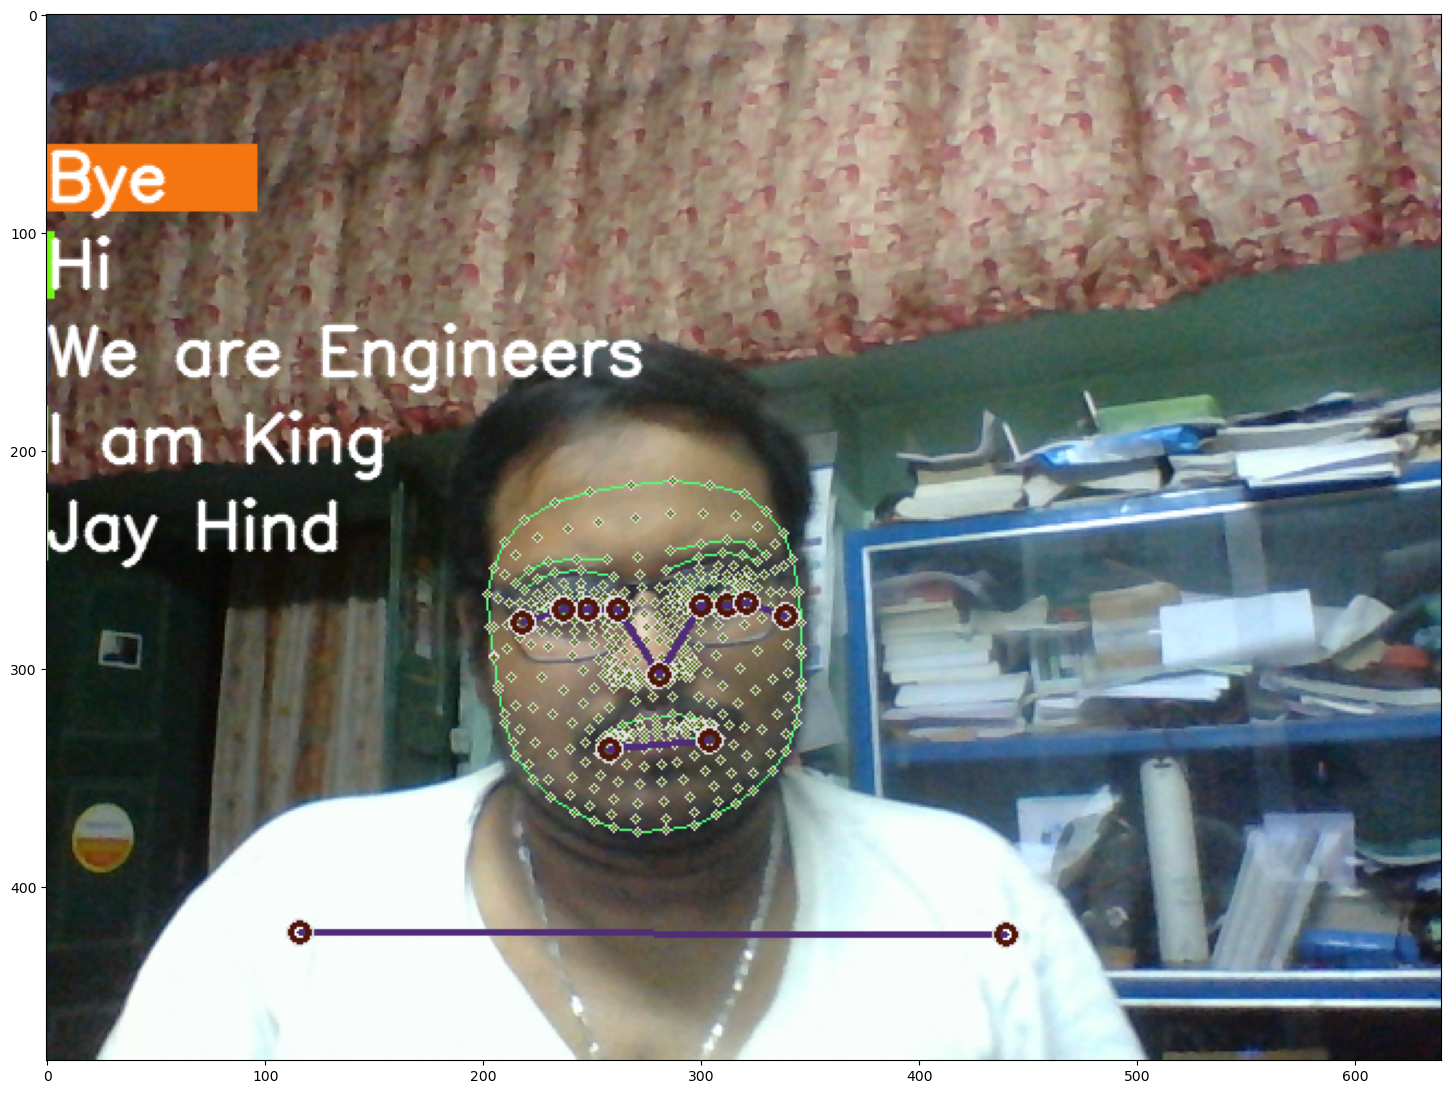

In [50]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))

In [51]:
# Test In Real Time

sequence = []
sentence = [] # Concadination Of Words
predictions = []
threshold = 0.4

cap = cv2.VideoCapture(0)
#Set Mediapipe Model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence= 0.5) as holistic:
    while cap.isOpened():
        # read Feed (camera Video Frame)
        ret, frame = cap.read()

        # Make Detection
        image, results = mediapipe_detection(frame, holistic)
        #print(results) # Prints The Results
        #print(results.face_landmarks) # Face Landmarks
        #print(results.pose_landmarks) # Pose Landmarks
        #print(results.left_hand_landmarks) # Left Hand Landmarks
        #print(results.right_hand_landmarks) # Right Hand Landmarks
        #print(results.count)
        #print(results.index)
        #print(results.mro)

        # Draw Landmarks in Style
        draw_landmarks_style(image, results)

        # Prediction Logic

        KeyPoints = extract_keypoints(results)
        # sequence.insert(0, KeyPoints)
        # sequence = sequence[:30]
        sequence.append(KeyPoints)
        sequence = sequence[-30:]

        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))

            # Visualization Logic
            if np.unique(predictions[-10:])[0] == np.argmax(res):
                if res[np.argmax(res)] > threshold:
                    if len(sentence)>0:
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5:
                sentence = sentence[-5:]

            image = prob_viz(res, actions, image, colors)

        cv2.rectangle(image, (0, 0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3, 30),
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)

        # Draw Landmarks in  normal
        #draw_landmarks(image, results)

        # Output To Screan
        cv2.imshow('OpenCV Feed', image)

        #break
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

1/1 [==============================] - 0s 85ms/step
Bye
1/1 [==============================] - 0s 50ms/step
Bye
1/1 [==============================] - 0s 57ms/step
Bye
1/1 [==============================] - 0s 90ms/step
Bye
1/1 [==============================] - 0s 70ms/step
Bye
1/1 [==============================] - 0s 61ms/step
Bye
1/1 [==============================] - 0s 71ms/step
Bye
1/1 [==============================] - 0s 70ms/step
Bye
1/1 [==============================] - 0s 66ms/step
Bye
1/1 [==============================] - 0s 65ms/step
Bye
1/1 [==============================] - 0s 48ms/step
Bye
1/1 [==============================] - 0s 57ms/step
Bye
1/1 [==============================] - 0s 59ms/step
Bye
1/1 [==============================] - 0s 62ms/step
Bye
1/1 [==============================] - 0s 66ms/step
Bye
1/1 [==============================] - 0s 59ms/step
Bye
1/1 [==============================] - 0s 72ms/step
Bye
1/1 [==============================] - 0s 56ms/s

1/1 [==============================] - 0s 61ms/step
Hi
1/1 [==============================] - 0s 52ms/step
Hi
1/1 [==============================] - 0s 69ms/step
Hi
1/1 [==============================] - 0s 78ms/step
I am King
1/1 [==============================] - 0s 45ms/step
I am King
1/1 [==============================] - 0s 50ms/step
I am King
1/1 [==============================] - 0s 48ms/step
I am King
1/1 [==============================] - 0s 63ms/step
I am King
1/1 [==============================] - 0s 49ms/step
I am King
1/1 [==============================] - 0s 57ms/step
Hi
1/1 [==============================] - 0s 58ms/step
Hi
1/1 [==============================] - 0s 42ms/step
Hi
1/1 [==============================] - 0s 47ms/step
Hi
1/1 [==============================] - 0s 47ms/step
Hi
1/1 [==============================] - 0s 47ms/step
Hi
1/1 [==============================] - 0s 54ms/step
Hi
1/1 [==============================] - 0s 55ms/step
Hi
1/1 [==================

Hi
1/1 [==============================] - 0s 56ms/step
Hi
1/1 [==============================] - 0s 47ms/step
I am King
1/1 [==============================] - 0s 47ms/step
I am King
1/1 [==============================] - 0s 47ms/step
I am King
1/1 [==============================] - 0s 56ms/step
I am King
1/1 [==============================] - 0s 61ms/step
I am King
1/1 [==============================] - 0s 44ms/step
I am King
1/1 [==============================] - 0s 50ms/step
I am King
1/1 [==============================] - 0s 43ms/step
I am King
1/1 [==============================] - 0s 47ms/step
I am King
1/1 [==============================] - 0s 43ms/step
I am King
1/1 [==============================] - 0s 48ms/step
I am King
1/1 [==============================] - 0s 47ms/step
I am King
1/1 [==============================] - 0s 47ms/step
I am King
1/1 [==============================] - 0s 50ms/step
I am King
1/1 [==============================] - 0s 50ms/step
I am King
1/1 [=======